In [2]:
import numpy as np 
import glob 
import matplotlib.pyplot as plt 



In [10]:
a6 = glob.glob("sftp/"+"act3/"+"ac*")
n1 = len(a6)
r1 = np.loadtxt(a6[0])
xp = np.zeros_like(r1)
for i in range(n1):
    r1 = np.loadtxt(a6[i])
    xp = xp + r1

In [11]:
n1

50

In [12]:
a = glob.glob("hydro/"+"Activity3/"+"ac*")
n2 = len(a)
r2 = np.loadtxt(a[0])
xp2 = np.zeros_like(r2)
for i in range(n2):
    r2 = np.loadtxt(a[i])
    xp2 = xp2 + r2


In [13]:
print(n1,n2)

50 25


In [14]:
xf = (xp+xp2)/(n1+n2)

In [19]:
np.savetxt('finalact3_75.txt',(xf))

In [21]:
ax = np.loadtxt('myact3f.txt')

In [24]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [29]:
plt.plot(ax[:,0]-1.738,ax[:,1])
plt.show()

In [28]:
plt.xscale('log')
plt.yscale('log')
plt.plot(xf[:,0]-1.738,xf[:,1],label='tot')
plt.legend()
plt.show()

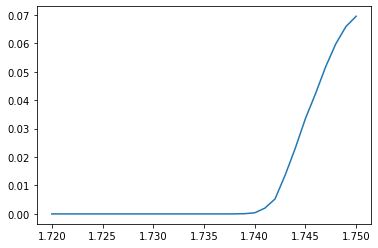

In [4]:
plt.plot(xp[:,0],xp[:,1])

In [8]:
np.savetxt('act1_25.txt',(xp ))

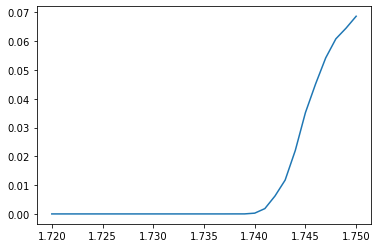

In [7]:
plt.plot(xp[:,0],xp[:,1])

In [17]:
np.savetxt('hf_1500.txt',(xp))

In [18]:
y1500 = np.loadtxt('hf_1500.txt')

In [9]:
y1000 = np.loadtxt('hf_1000.txt')

In [12]:
y500 = np.loadtxt('hf_500.txt')

In [19]:
x500 = np.linspace(0,1,500)
x1000 = np.linspace(0,1,1000)
x1500 = np.linspace(0,1,1500)

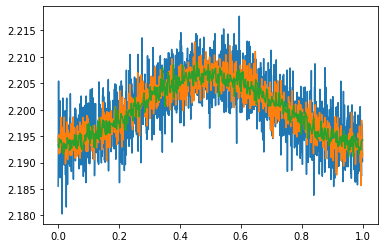

In [21]:
plt.plot(x1500,y1500)
plt.plot(x1000,y1000)
plt.plot(x500,y500)


In [5]:
n1

25

In [5]:
ax = np.loadtxt('ac_f.txt')

OSError: ac_f.txt not found.

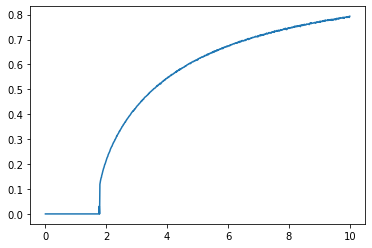

In [4]:
plt.plot(ax[:,0],ax[:,1])

In [6]:
np.savetxt('activ500.dat',(xp))

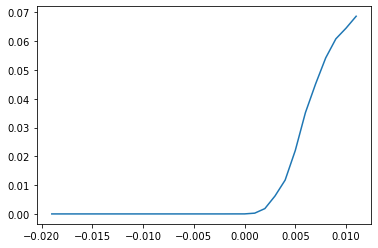

In [4]:
plt.plot(xp[:,0]-1.739,xp[:,1])
plt.show()

In [11]:
ya4 = np.loadtxt('fa4.txt')
ya45 = np.loadtxt('fa45.txt')
ya5 = np.loadtxt('ap5x1.txt')
ya6 = np.loadtxt('ap6x1.txt')

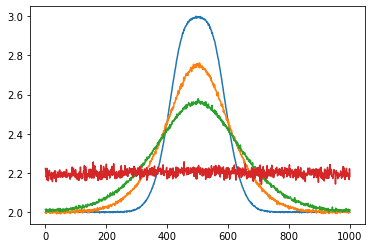

In [5]:
plt.plot(ya4)
plt.plot(ya45)
plt.plot(ya5)
plt.plot(ya6)

In [22]:
yb4 = np.copy(ya4)
yb45 = np.copy(ya45)
yb5 = np.copy(ya5)
yb6 = np.copy(ya6)

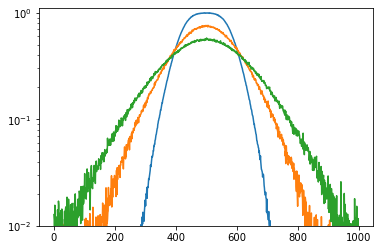

In [86]:
plt.yscale('log')
plt.ylim(0.01,1.1)
plt.plot(ya4-2)
plt.plot(ya45-2)
plt.plot(ya5-2)
#plt.plot(ya6-2)

In [3]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
#===== Initial profile=======
@jit(nopython=True)
def rho(x,dx,rho_0,rho_1,del_0):
    Ns = int(x/dx)
    nx_0 = np.zeros(Ns)
    del_1 = int(del_0*Ns)
    del_2 = int((Ns - del_1)/2)
    for i in range(Ns):

        if i < del_2:
            nx_0[i] = rho_1
        else :
            if i < (del_1+del_2):
                nx_0[i] = rho_0
            else :
                nx_0[i] = rho_1
    return nx_0

@jit(nopython=True)
def D(r):
    if r > 1:
        D = 1/(2*r*r)
    else :
        D = 0
    return D

@jit(nopython=True)
def trho(x,dx,rho_0,rho_1,del_0,dt,tt):
    ns = int(x/dx)
    F = dt/(dx*dx)
    rh = rho(x,dx,rho_0,rho_1,del_0)
    Nt = int(tt/dt)
    for n in range(Nt):
        j = np.zeros(ns)
        dj = np.zeros(ns)   
        for i in range(ns):
            j[i] = -D(rh[i])*(rh[(i+1)%ns] - rh[i-1])/(2*dx)
        for i in range(ns):
            dj [i] = -(j[(i+1)%ns] - j[i-1])/(2*dx)    
        rh += dt*dj  
    return rh


Wall time: 4.98 s


In [4]:
t0 = trho(1, 0.001, 3, 2, 0.2, 0.000001, 0)
tb4  = trho(1, 0.001, 3, 2, 0.2, 0.000001,0.01)
tb45  = trho(1, 0.001, 3, 2, 0.2, 0.000001,0.05)
tb5  = trho(1, 0.001, 3, 2, 0.2, 0.000001,0.1)
tb6  = trho(1, 0.001, 3, 2, 0.2, 0.000001,1)


In [23]:
n1 = 1000
for j in range(1):
    for i in range(int(n1)):
        i1 = 999 - i
        yb4[i] = (yb4[i]+yb4[i-1]+yb4[i-2]+yb4[(i+1)%n1]+yb4[(i+2)%n1])/5
        #yb4[i1] = (yb4[i1]+yb4[i1-1]+yb4[i1-2]+yb4[(i1+1)%n1]+yb4[(i1+2)%n1])/5
        yb45[i] = (yb45[i]+yb45[i-1]+yb45[i-2]+yb45[(i+1)%n1]+yb45[(i+2)%n1])/5
        #yb45[i1] = (yb45[i1]+yb45[i1-1]+yb45[i1-2]+yb45[(i1+1)%n1]+yb45[(i1+2)%n1])/5
        yb5[i] = (yb5[i]+yb5[i-1]+yb5[i-2]+yb5[(i+1)%n1]+yb5[(i+2)%n1])/5
        #yb5[i1] = (yb5[i1]+yb5[i1-1]+yb5[i1-2]+yb5[(i1+1)%n1]+yb5[(i1+2)%n1])/5
        yb6[i] = (yb6[i]+yb6[i-1]+yb6[i-2]+yb6[(i+1)%n1]+yb6[(i+2)%n1])/5
        #yb6[i1] = (yb6[i1]+yb6[i1-1]+yb6[i1-2]+yb6[(i1+1)%n1]+yb6[(i1+2)%n1])/5


In [40]:
np.savetxt('fbs4.txt',(yb4))
np.savetxt('fbs45.txt',(yb45))
np.savetxt('fbs5.txt',(yb5))
np.savetxt('fbs6.txt',(yb6))


In [16]:
n1 = 1000
for j in range(1):
    for i in range(int(n1/2)):
        i1 = 999 - i
        tb4[i] = (tb4[i]+tb4[i-1]+tb4[i-2]+tb4[(i+1)%n1]+tb4[(i+2)%n1])/5
        tb4[i1] = (tb4[i1]+tb4[i1-1]+tb4[i1-2]+tb4[(i1+1)%n1]+tb4[(i1+2)%n1])/5
        tb45[i] = (tb45[i]+tb45[i-1]+tb45[i-2]+tb45[(i+1)%n1]+tb45[(i+2)%n1])/5
        tb45[i1] = (tb45[i1]+tb45[i1-1]+tb45[i1-2]+tb45[(i1+1)%n1]+tb45[(i1+2)%n1])/5
        tb5[i] = (tb5[i]+tb5[i-1]+tb5[i-2]+tb5[(i+1)%n1]+tb5[(i+2)%n1])/5
        tb5[i1] = (tb5[i1]+tb5[i1-1]+tb5[i1-2]+tb5[(i1+1)%n1]+tb5[(i1+2)%n1])/5
        tb6[i] = (tb6[i]+tb6[i-1]+tb6[i-2]+tb6[(i+1)%n1]+tb6[(i+2)%n1])/5
        tb6[i1] = (tb6[i1]+tb6[i1-1]+tb6[i1-2]+tb6[(i1+1)%n1]+tb6[(i1+2)%n1])/5


In [36]:
np.savetxt('fbt4.txt',(tb4))
np.savetxt('fbt45.txt',(tb45))
np.savetxt('fbt5.txt',(tb5))
np.savetxt('fbt6.txt',(tb6))


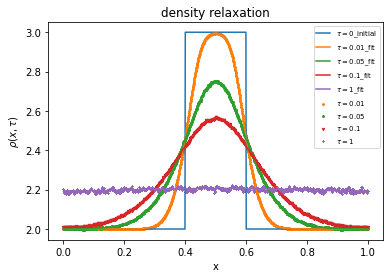

In [123]:
plt.figure(1)

plt.xlabel('x')
plt.ylabel(r'$\rho(x,\tau)$')
plt.title("density relaxation")

plt.plot(x,t0,label=r'$\tau=0$_initial')
plt.scatter(x,yb4,marker="*",c='#ff7f0e',s=5,label=r'$\tau=0.01$')
plt.scatter(x,yb45,marker="p",s=5,c='#2ca02c',label=r'$\tau=0.05$')
plt.scatter(x,yb5,marker='v',c='#d62728',s=5,label=r'$\tau=0.1$')
plt.scatter(x,yb6,marker="P",c='#9467bd',s=5,label=r'$\tau=1$')
plt.plot(x,tb4,label=r'$\tau=0.01$_fit')
plt.plot(x,tb45,label=r'$\tau=0.05$_fit')
plt.plot(x,tb5,label=r'$\tau=0.1$_fit')
plt.plot(x,tb6,label=r'$\tau=1$_fit')
plt.legend()
plt.legend(fontsize=10) # using a size in points
plt.legend(fontsize="x-small") #using a name size

plt.figure(1).savefig('dracf4.jpg',dpi = 1500)

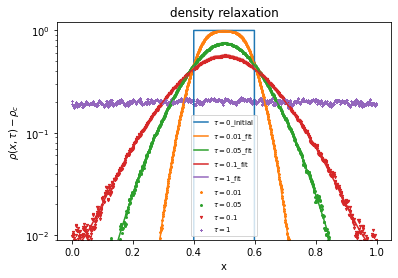

In [126]:
plt.figure(1)

plt.xlabel('x')
plt.ylabel(r'$\rho(x,\tau)-\rho_c$')
plt.title("density relaxation")
plt.yscale('log')
plt.ylim(0.009,1.2)
plt.plot(x,t0-2,label=r'$\tau=0$_initial')
plt.scatter(x,yb4-2,marker="*",c='#ff7f0e',s=5,label=r'$\tau=0.01$')
plt.scatter(x,yb45-2,marker="p",s=5,c='#2ca02c',label=r'$\tau=0.05$')
plt.scatter(x,yb5-2,marker='v',c='#d62728',s=5,label=r'$\tau=0.1$')
plt.scatter(x,yb6-2,marker="P",c='#9467bd',s=5,label=r'$\tau=1$')
plt.plot(x,tb4-2,label=r'$\tau=0.01$_fit')
plt.plot(x,tb45-2,label=r'$\tau=0.05$_fit')
plt.plot(x,tb5-2,label=r'$\tau=0.1$_fit')
plt.plot(x,tb6,label=r'$\tau=1$_fit')
plt.legend()
plt.legend(fontsize=5) # using a size in points
plt.legend(fontsize="x-small") #using a name size

plt.figure(1).savefig('drac_log1.jpg',dpi = 1500)

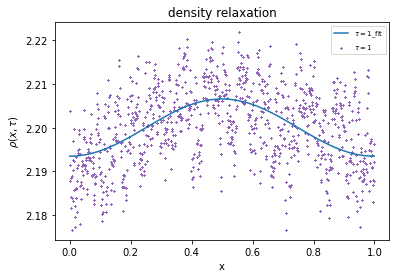

In [25]:
plt.figure(1)

plt.xlabel('x')
plt.ylabel(r'$\rho(x,\tau)$')
plt.title("density relaxation")
x = np.arange(0,1,0.001)
#plt.plot(x,t0,label=r'$\tau=0$_initial')
#plt.scatter(x,yb4,marker="*",c='#ff7f0e',s=5,label=r'$\tau=0.01$')
#plt.scatter(x,yb45,marker="p",s=5,c='#2ca02c',label=r'$\tau=0.05$')
#plt.scatter(x,yb5,marker='v',c='#d62728',s=5,label=r'$\tau=0.1$')
plt.scatter(x,yb6,marker="P",c='#9467bd',s=5,label=r'$\tau=1$')
#plt.plot(x,tb4,label=r'$\tau=0.01$_fit')
#plt.plot(x,tb45,label=r'$\tau=0.05$_fit')
#plt.plot(x,tb5,label=r'$\tau=0.1$_fit')
plt.plot(x,tb6,label=r'$\tau=1$_fit')
plt.legend()
plt.legend(fontsize=10) # using a size in points
plt.legend(fontsize="x-small") #using a name size
plt.figure(1).savefig('drac6f5.jpg',dpi = 1500)

In [5]:
sac6 = np.loadtxt('apt5h10.txt')

In [18]:
xp = np.loadtxt('ap6x4f.txt')

In [22]:
mt = np.copy(tb6)
xp = np.loadtxt('ap6x4f.txt')

In [23]:
n1 = 1000
for j in range(1):
    for i in range(n1):
        xp[i] = (xp[i]+xp[i-1]+xp[i-2]+xp[(i+1)%n1]+xp[(i+2)%n1]+xp[i-3]+xp[(i+3)%n1])/7
        mt[i] = (mt[i]+mt[i-1]+mt[i-2]+mt[(i+1)%n1]+mt[(i+2)%n1]+mt[i-3]+mt[(i+3)%n1])/7

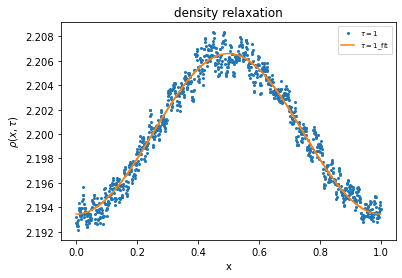

In [25]:
plt.figure(1)
plt.xlabel('x')
plt.ylabel(r'$\rho(x,\tau)$')
plt.title("density relaxation")
x = np.arange(0,1,0.001)
plt.plot(x,xp,'o',markersize=2,label=r'$\tau=1$')
plt.plot(x,tb6,label=r'$\tau=1$_fit')
plt.legend()
plt.legend(fontsize=10) # using a size in points
plt.legend(fontsize="x-small") #using a name size
plt.figure(1).savefig('d1.jpg',dpi = 600)